# Logistic Regression

## Table of Contents

1. [Introduction](#introduction)
2. [Import Libraries](#libraries)
3. [Logistic Function](#function)
4. [Logistic Regression](#regression)

## Introduction<a id='introduction'></a>

In regression analysis, logistic regression[[1]](https://jamanetwork.com/journals/jama/article-abstract/2540383) (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination). Formally, in binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value)[[2]](https://en.wikipedia.org/wiki/Logistic_regression). 

Logistic regression uses an equation as the representation, very much like linear regression.

$$\hat{y}=\frac{e^{b_0+b_1×x}}{1 + e^{b_0+b_1×x}}$$

This function provides a probability between 0 and 1 which has to be mapped to binary values (0 or 1) later. That's why this function can be presented as per below.

$$P(x)=\frac{e^{b_0+b_1×x}}{1 + e^{b_0+b_1×x}} ==> ln(\frac{P(x)}{1 - P(x)}) = b_0+b_1×x$$

To map the probability to binary we use:
$$\hat{y} = 0 \text{  IF  } p(x) < 0.5$$
$$\hat{y} = 1 \text{  IF  } p(x) \geq 0.5$$

## Import Libraries<a id='libraries'></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Logistic Function<a id='function'></a>

The logistic function, also called the sigmoid function was developed by statisticians to describe
properties of population growth in ecology. It’s an S-shaped curve that can take any real-valued number and
map it into a value between 0 and 1.

$$\frac{1}{1 + e^{-value}}$$

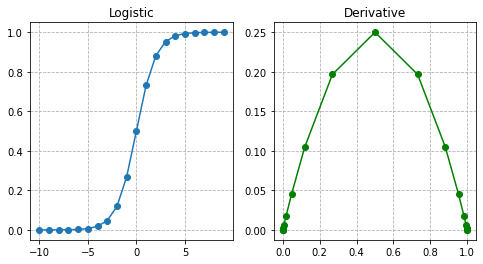

In [2]:
# Create data
x = []
for i in range(-10, 10):
  x.append(i)

df_logistic = pd.DataFrame(columns=['x']) # Convert the data into dataframe
df_logistic['x'] = x
df_logistic['Logistic'] = 1 / (1 + np.exp(-df_logistic['x'])) # Calculate the logistic of the data values using aboev function
df_logistic['Derivative'] = df_logistic['Logistic'] * (1 - df_logistic['Logistic']) # Calculate the derivative of the logistic values

# Plot the Logistic values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(df_logistic['x'], df_logistic['Logistic'], 'o-')
plt.grid(linestyle = '--')
plt.title('Logistic', fontsize=12)

# Plot the Derivative values
plt.subplot(1, 2, 2)
plt.plot(df_logistic['Logistic'], df_logistic['Derivative'], 'go-')
plt.grid(linestyle = '--')
plt.title('Derivative', fontsize=12)

plt.show()

## Logistic Regression<a id="regression"></a>

### Load Sample Data


In [3]:
x1 = [2.7810836, 1.465489372, 3.396561688, 1.38807019, 3.06407232, 7.627531214, 5.332441248, 6.922596716, 8.675418651, 7.673756466]
x2 = [2.550537003, 2.362125076, 4.400293529, 1.850220317, 3.005305973, 2.759262235, 2.088626775, 1.77106367, -0.242068655, 3.508563011]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df = pd.DataFrame(columns=['x1', 'x2', 'y'])
df['x1'] = x1
df['x2'] = x2
df['y'] = y

df

,x1,x2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


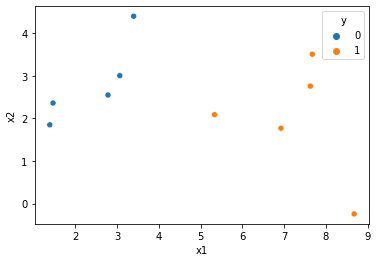

In [6]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.show()

In [27]:
lr = 0.3 # Learning Rate
bias = 1 # Bias
b0 = 0
b1 = 0
b2 = 0
pred = [] # Predictions
sharp_pred = [] # Predictions that are mapped to binary format 
sq_error = []
error = []

df_lr = df.copy()
for i in range(0, len(df_lr)):
  y_hat = 1 / (1 + np.exp(-1 * ((bias * b0) + (df_lr.loc[i, 'x1'] * b1) + (df_lr.loc[i, 'x2'] * b2))))
  pred.append(y_hat)
  b0 = b0 + lr*(df.loc[i, 'y'] - y_hat) * y_hat * (1-y_hat) * bias
  b1 = b1 + lr*(df.loc[i, 'y'] - y_hat) * y_hat * (1-y_hat) * df.loc[i, 'x1']
  b2 = b2 + lr*(df.loc[i, 'y'] - y_hat) * y_hat * (1-y_hat) * df.loc[i, 'x2']
  if y_hat < 0.5:
    sharp_pred.append(0)
  else:
    sharp_pred.append(1)

  sq_error.append(np.square(y_hat - df.loc[i, 'y']))
  if sharp_pred[i] == df.loc[i, 'y']:
    error.append(0)
  else:
    error.append(1)

df_lr['Predictions'] = pred
df_lr['Sharp Predictions'] = sharp_pred
df_lr['Squared Error'] = sq_error
df_lr['Error'] = error

df_lr

,x1,x2,y,Predictions,Sharp Predictions,Squared Error,Error
0,2.781084,2.550537,0,0.500000,1,0.250000,1
1,1.465489,2.362125,0,0.397411,0,0.157936,0
2,3.396562,4.400294,0,0.217546,0,0.047326,0
3,1.388070,1.850220,0,0.326388,0,0.106529,0
4,3.064072,3.005306,0,0.180885,0,0.032719,0
5,7.627531,2.759262,1,0.063777,0,0.876513,1
6,5.332441,2.088627,1,0.238895,0,0.579281,1
7,6.922597,1.771064,1,0.614475,1,0.148629,0
8,8.675419,-0.242069,1,0.931473,1,0.004696,0
9,7.673756,3.508563,1,0.885111,1,0.013199,0


In [24]:
error

[1, 1, 1, 1, 1, 1, 1, 1, 1]

### Data Preparation

Since logistic regression is a linear model, we have the similar data preparation process as we have in Liner Regression. Those are:

1. The output has to have **binary variable**
2. Remove Noise
3. Inputs should have **Gaussian Distribution**
4. Correlated inputs should be removed 

